In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

from collections import Counter
from sklearn.datasets import fetch_lfw_people
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay as cmd

In [2]:
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


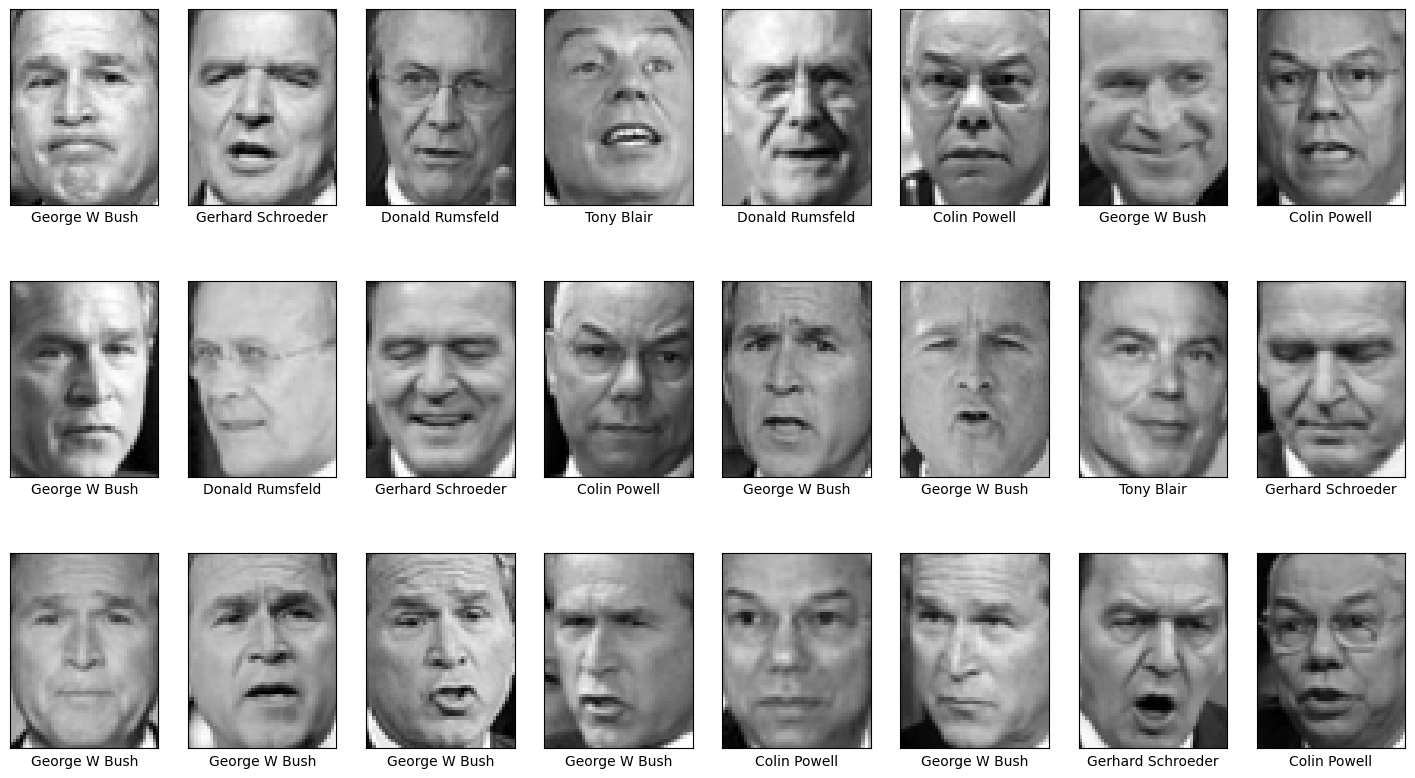

In [5]:
fig, ax = plt.subplots(3,8, figsize=(18,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gist_gray')
    axi.set(xticks=[], yticks=[],
            xlabel = faces.target_names[faces.target[i]])

<Axes: >

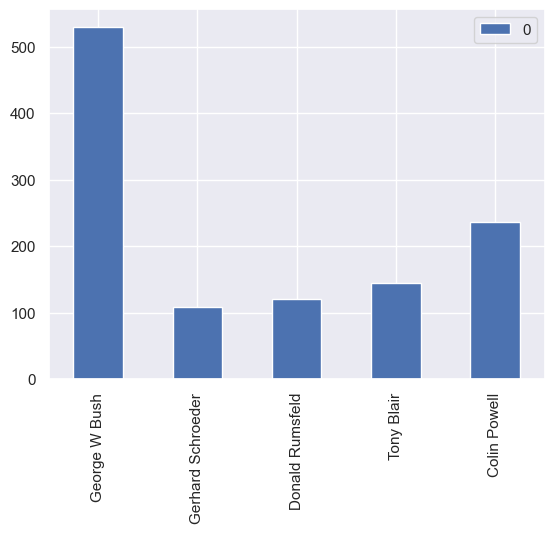

In [7]:
counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind = 'bar')

In [8]:
mask = np.zeros(faces.target.shape, dtype=bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target) [0][:100]] = 1

x = faces.data[mask]
y = faces.target[mask]
x.shape

(500, 2914)

In [12]:
svc = SVC(kernel='linear')

grid = {
    'C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=svc, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y) # Train the model with different parameters
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ...............................................C=10; total time=   0.1s
[CV] END ........................................

0.844

In [15]:
scaler  = StandardScaler()
svc = SVC(kernel='linear')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.1s
[CV] END .........................................svc__C=0.1; total time=   0.1s
[CV] END .........................................svc__C=0.1; total time=   0.1s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ..........................................svc__C=10; total time=   0.1s
[CV] END ........................................

0.8619999999999999

In [16]:
grid_search.best_params_

{'svc__C': 0.1}

In [19]:
scaler = StandardScaler()
svc = SVC(kernel='poly')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1,1,10,100],
    'svc__gamma': [.01,.25,.5,.75,1],
    'svc__degree': [1,2,3,4,5]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y) # Train the model with different parameter combinations
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.1s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   0.1s
[CV] END ..........svc__C=0.1, svc__degree=1, 

0.8619999999999999

In [20]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.25}

In [21]:
scaler = StandardScaler()
svc = SVC(kernel='rbf')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [.1,1,10,100],
    'svc__gamma':[.01,.25,.5,.75,1.0]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.2s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   0.3s
[CV] END .........................svc__C=0.1, s

0.472

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8, stratify=y,random_state=0)

In [24]:
scaler = StandardScaler()
svc = SVC(kernel = 'linear', C=0.1)
pipe = make_pipeline(scaler, svc)
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [26]:
cross_val_score(pipe, x,y, cv=5).mean()

0.8619999999999999

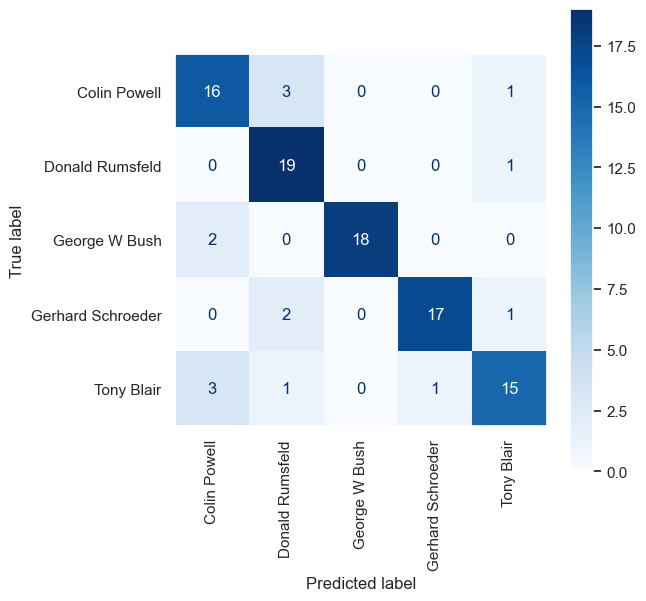

In [28]:
fig, ax = plt.subplots(figsize = (6,6))
ax.grid(False)
cmd.from_estimator(pipe, x_test, y_test, display_labels=faces.target_names, cmap = 'Blues', xticks_rotation='vertical', ax=ax)